## Import Required Packages

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

## Load the dataset

In [2]:
# Reading Dataset
df = pd.read_csv("../data/diabetes.csv")

# displays the top 5 columns of the dataframe
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


## Understanding the Dataset

In [3]:
# no of rows and columns in the dataframe
df.shape

(2000, 9)

In [4]:
# column names of the dataframe
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
# data types of each column in the dataframe
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
# basic info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [7]:
# counting null values in each column of the dataframe
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
## renaming DiabetesPedigreeFunction column name to 'DPF' for simplicity
df = df.rename(columns={"DiabetesPedigreeFunction": "DPF"})
df.sample()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
1264,1,96,122,0,0,22.4,0.207,27,0


In [9]:
# replacing 0's as 'No' & 1's as 'Yes'
df.Outcome.replace(to_replace={0: "No", 1: "Yes"}, inplace=True)
df.sample()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
1788,2,122,76,27,200,35.9,0.483,26,No


In [10]:
# count values of categorical column 'Outcome'
df.Outcome.value_counts()

No     1316
Yes     684
Name: Outcome, dtype: int64

In [11]:
# percentage of split between the categorical values
df.Outcome.value_counts(normalize=True)

No     0.658
Yes    0.342
Name: Outcome, dtype: float64

In [12]:
# gives a brief summary stats of the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DPF,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00


## Data Visualization

In [13]:
from scipy import stats
from statsmodels.api import qqplot

In [14]:
# function takes a single dataframe column name as argument and
# plots a 2 x 2 subplot contains (histogram, quantile-quantile plot, kernel density estimate plot and cumulative density plot)
def plot_distribution(col_name):
    fig, axes = plt.subplots(
        2, 2, figsize=(15, 10)
    )  # sets 2 x 2 subplots with figure size of (14,10)
    sns.histplot(
        x=col_name, data=df, ax=axes[0][0], bins=20
    )  # displays histogram of the given dataframe column
    qqplot(
        data=df[col_name], ax=axes[0][1], line="45", fit=True, dist=stats.norm
    )  # displays quantile-quantile plot of the given dataframe column
    sns.kdeplot(
        x=col_name, data=df, ax=axes[1][0], fill=True
    )  # displays kernel density estimate plot of the given dataframe column
    sns.kdeplot(
        x=col_name, data=df, ax=axes[1][1], fill=True, cumulative=True
    )  # displays cumulative density plot of the given dataframe column
    plt.suptitle(
        "Distribution of " + col_name
    )  # sets the title for the subplot as "Distribution of <column name>"
    plt.show()  # shows the plot

In [15]:
# function takes a single dataframe column name as argument and
# plots a 2 x 2 subplot contains (boxplot, violinplot, swarmplot and barplot)
def plot_stats(col_name):
    fig, axes = plt.subplots(
        2, 2, figsize=(15, 10)
    )  # sets 2 x 2 subplots with figure size of (14,10)
    sns.boxplot(
        y=col_name, x="Outcome", data=df, ax=axes[0][0], palette="viridis_r"
    )  # displays boxplot of the given dataframe column
    sns.violinplot(
        y=col_name, x="Outcome", data=df, ax=axes[0][1], split=True, palette="viridis_r"
    )  # displays violinplot of the given dataframe column
    sns.swarmplot(
        y=col_name, x="Outcome", data=df, ax=axes[1][0], palette="viridis_r"
    )  # displays swarmplot of the given dataframe columns
    sns.barplot(
        x=col_name, y="Outcome", data=df, hue="Outcome", palette="viridis_r"
    )  # displays barplot of the given dataframe column respect to 'Outcome' column
    plt.suptitle(
        "Statistics of " + col_name
    )  # sets the title for the subplot as "Statistics of <column name>"
    plt.show()  # shows the plot

In [16]:
# function takes a single dataframe column name as argument and
# plots a single plot contains kernel density estimate plot
def plot_kde(col_name):
    facet = sns.FacetGrid(
        df, hue="Outcome", aspect=4, palette="bright"
    )  # sets a seaborn FacetGrid with hue = "Outcome" and palette as "bright"
    facet.map(
        sns.kdeplot, col_name, shade=True
    )  # kernel density plot of the given dataframe column respect to the dependent column "Outcome"
    facet.set(
        xlim=(0, df[col_name].max())
    )  # sets the x axis from 0 to maximum value of the column
    facet.add_legend()  # add legend to the plot
    plt.title(
        col_name + " respect to Outcome"
    )  # sets the title for the plot as "<column name> respect to Outcome"
    plt.show()  # shows the plot

### Outcome

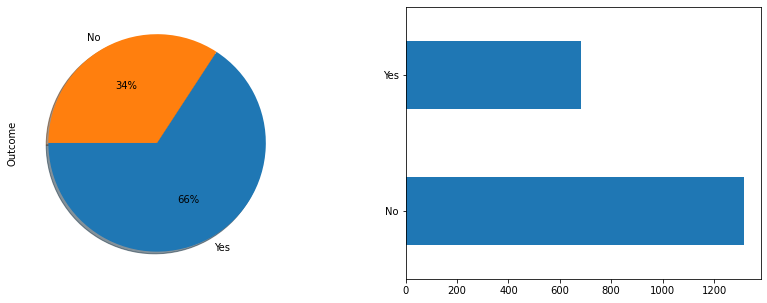

In [17]:
fig, ax = plt.subplots(
    nrows=1, ncols=2, figsize=(14, 5)
)  # sets 1 x 2 subplots with figure size of (14,5)
df.Outcome.value_counts().plot.pie(
    autopct="%.0f%%", labels=df.Outcome.unique(), shadow=True, startangle=180, ax=ax[0]
)  # plots pie chart of Outcome column with % percentage
df.Outcome.value_counts().plot.barh(
    ax=ax[1]
)  # plots bar chart of Outcome column value counts
plt.show()  # shows the plot

### Pregnancies

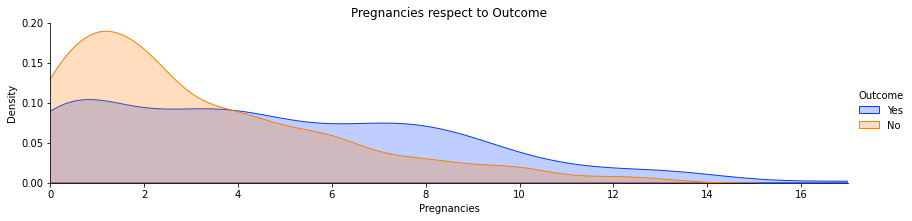

In [18]:
plot_kde("Pregnancies")

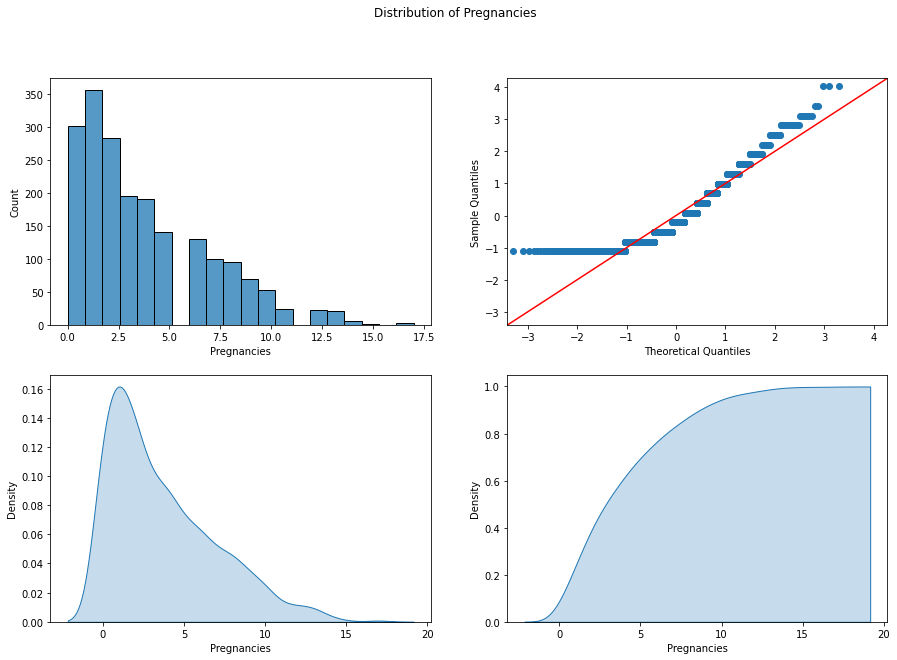

In [19]:
plot_distribution("Pregnancies")

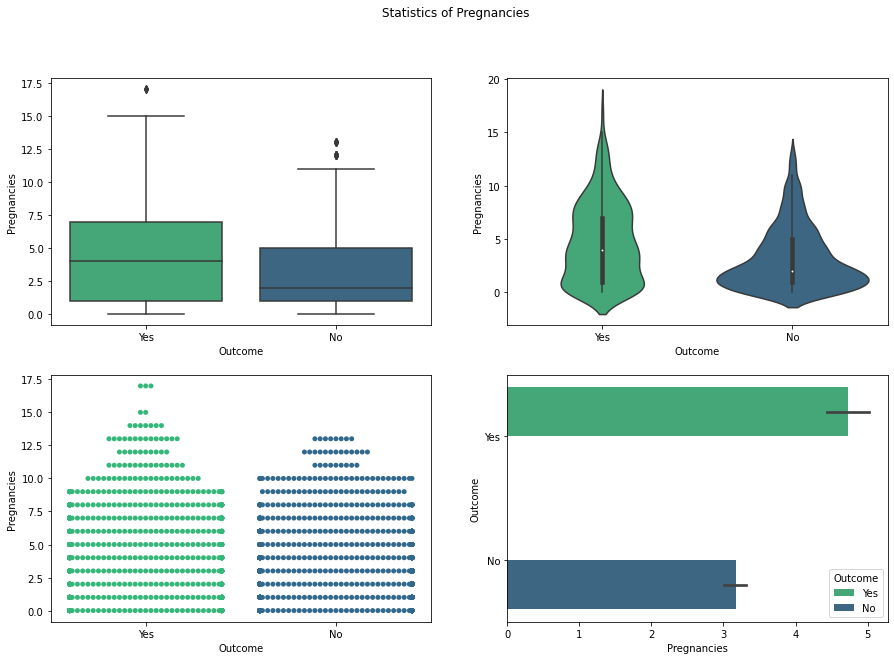

In [20]:
plot_stats("Pregnancies")

### Glucose

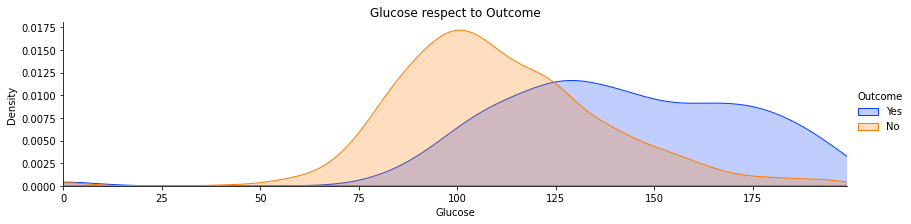

In [21]:
plot_kde("Glucose")

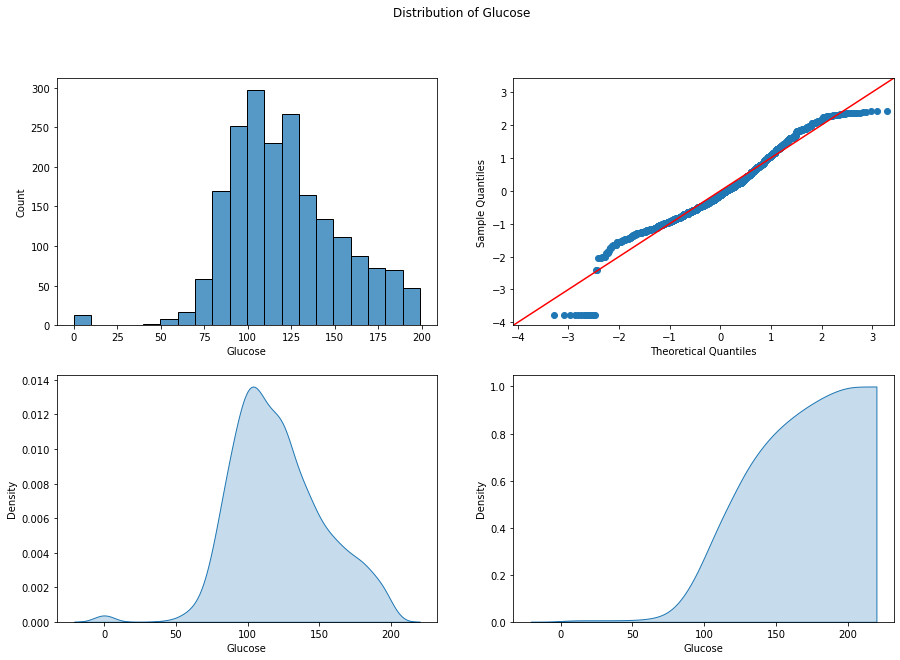

In [22]:
plot_distribution("Glucose")

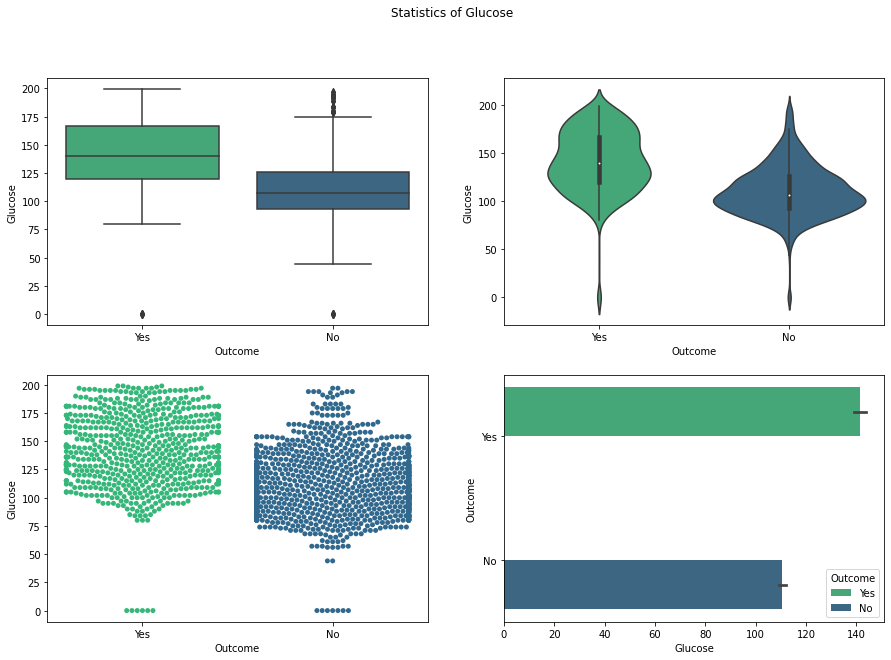

In [23]:
plot_stats("Glucose")

### BloodPressure

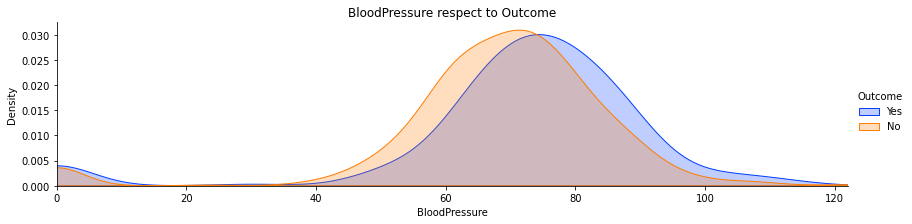

In [24]:
plot_kde("BloodPressure")

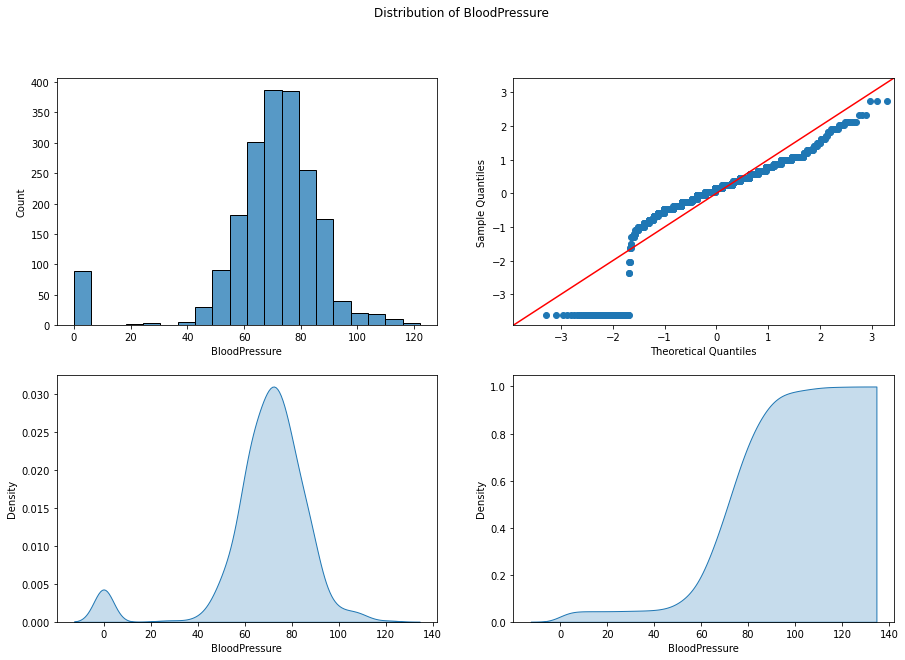

In [25]:
plot_distribution("BloodPressure")

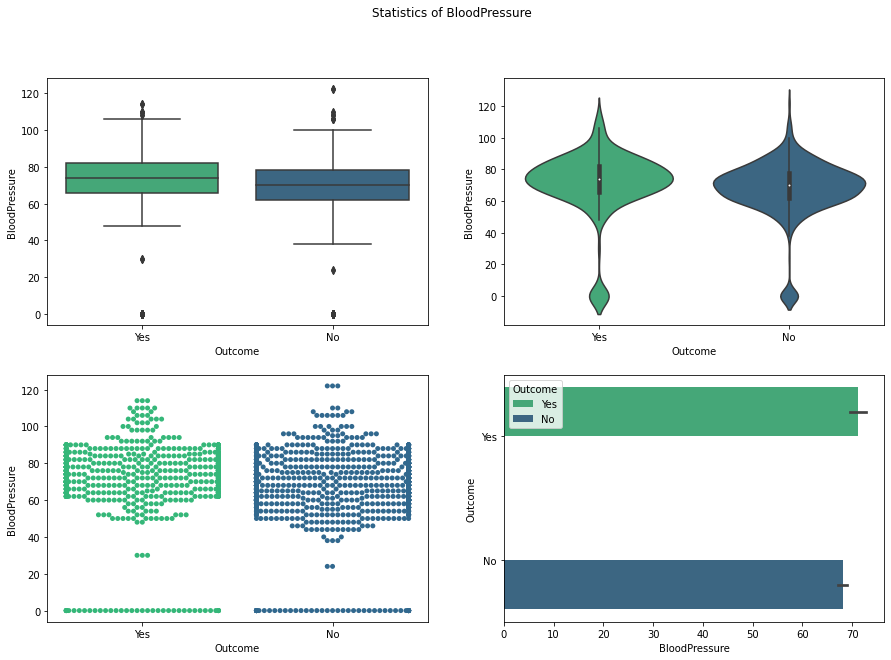

In [26]:
plot_stats("BloodPressure")

### SkinThickness

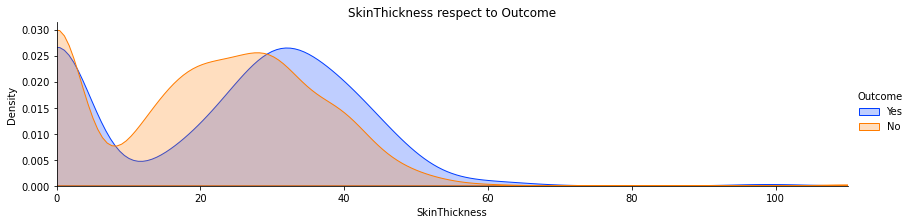

In [27]:
plot_kde("SkinThickness")

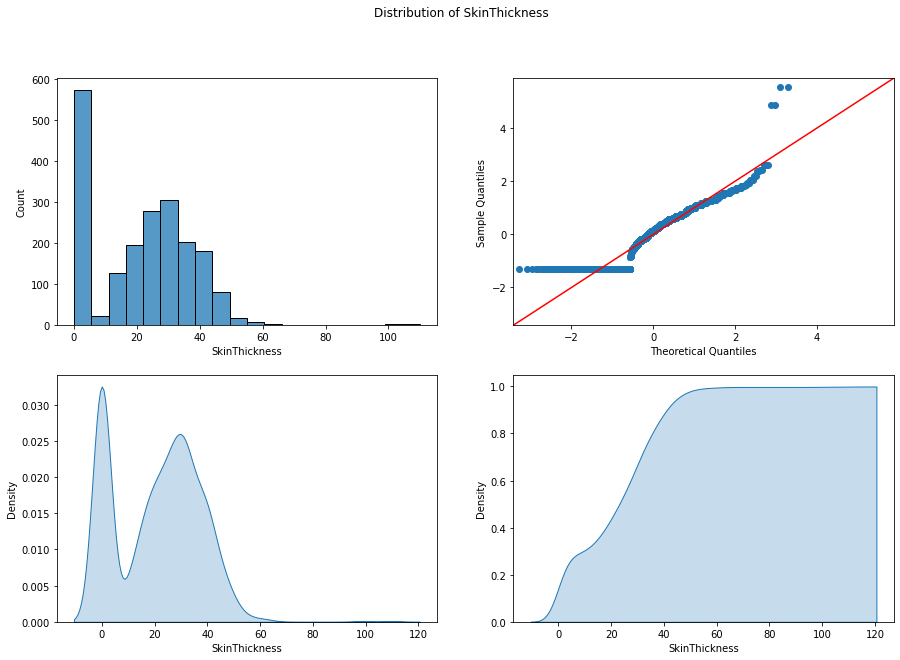

In [28]:
plot_distribution("SkinThickness")

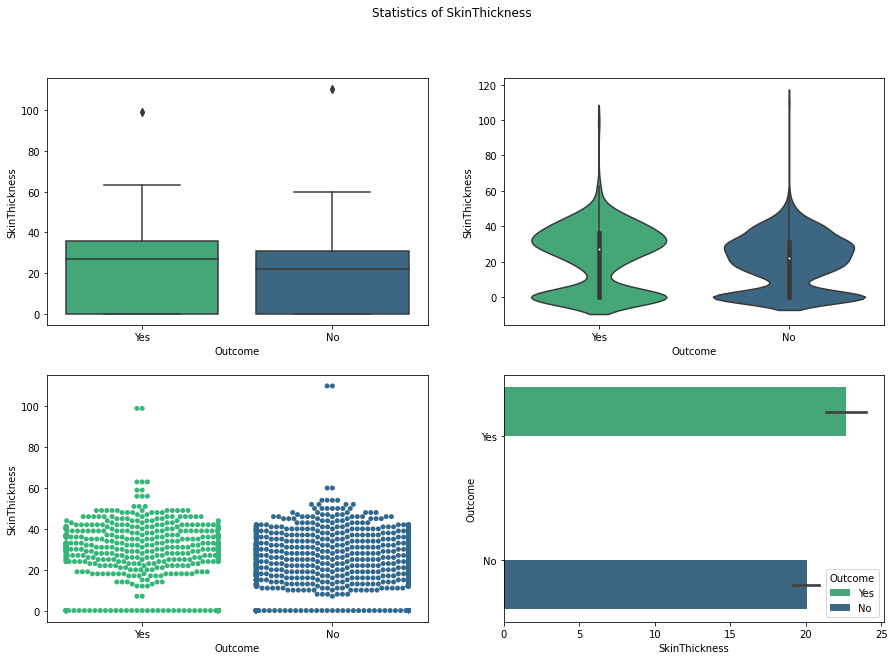

In [29]:
plot_stats("SkinThickness")

### Insulin

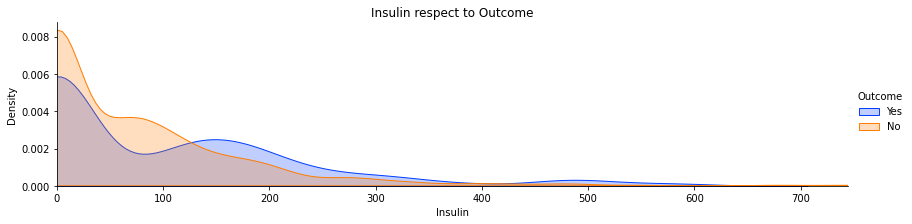

In [30]:
plot_kde("Insulin")

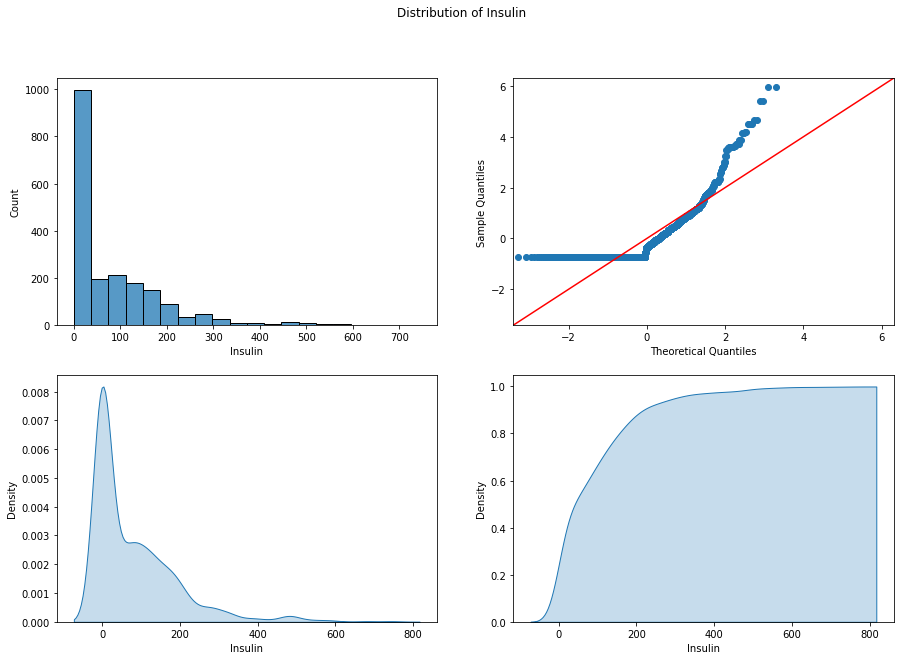

In [31]:
plot_distribution("Insulin")

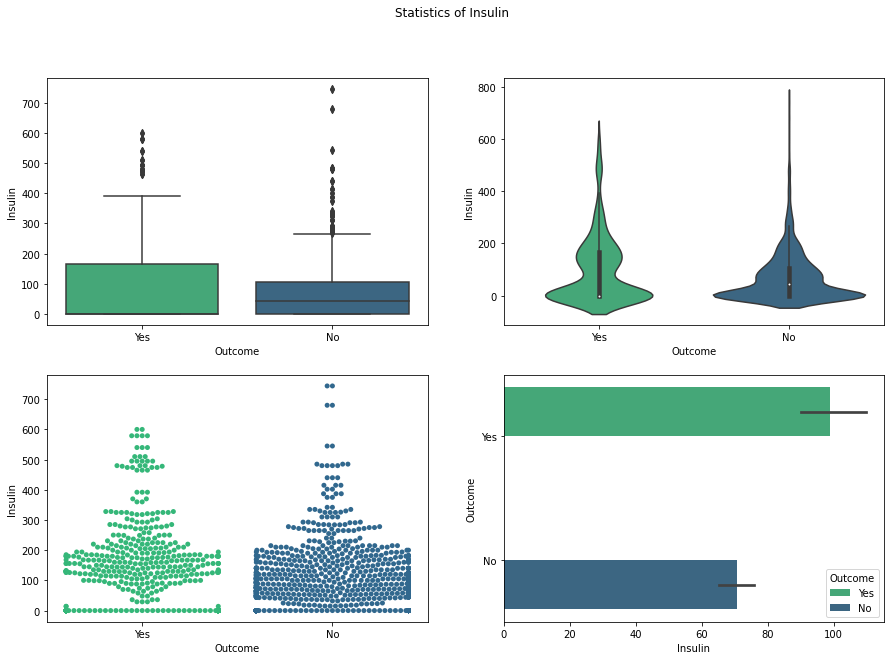

In [32]:
plot_stats("Insulin")

### BMI

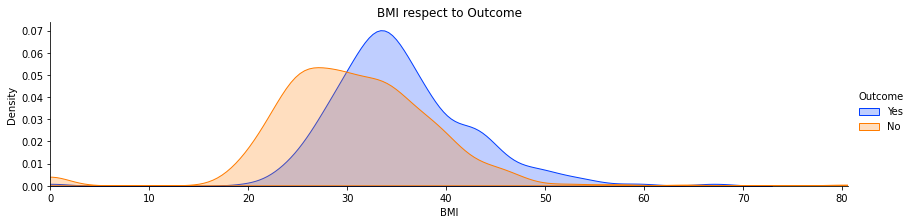

In [33]:
plot_kde("BMI")

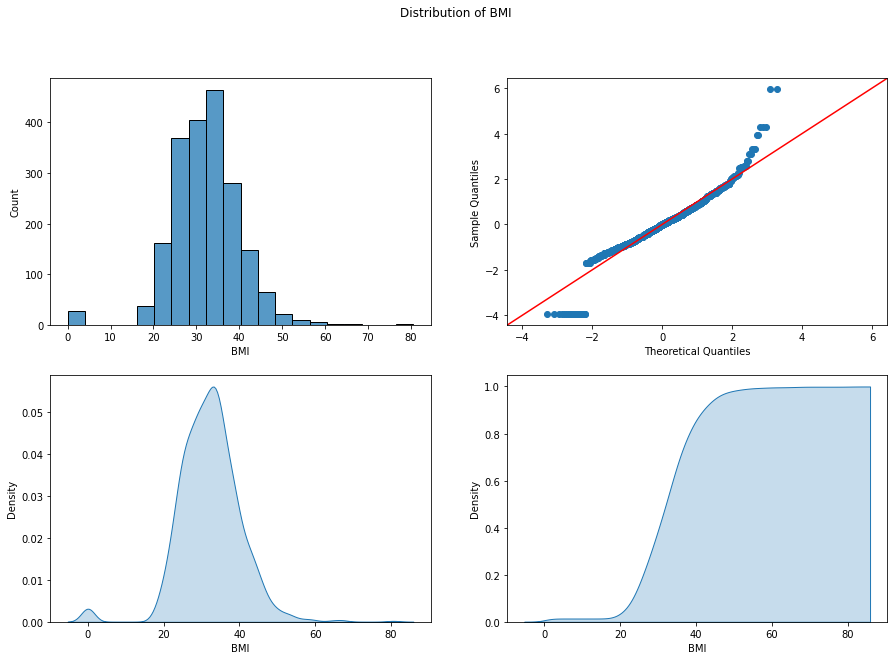

In [34]:
plot_distribution("BMI")

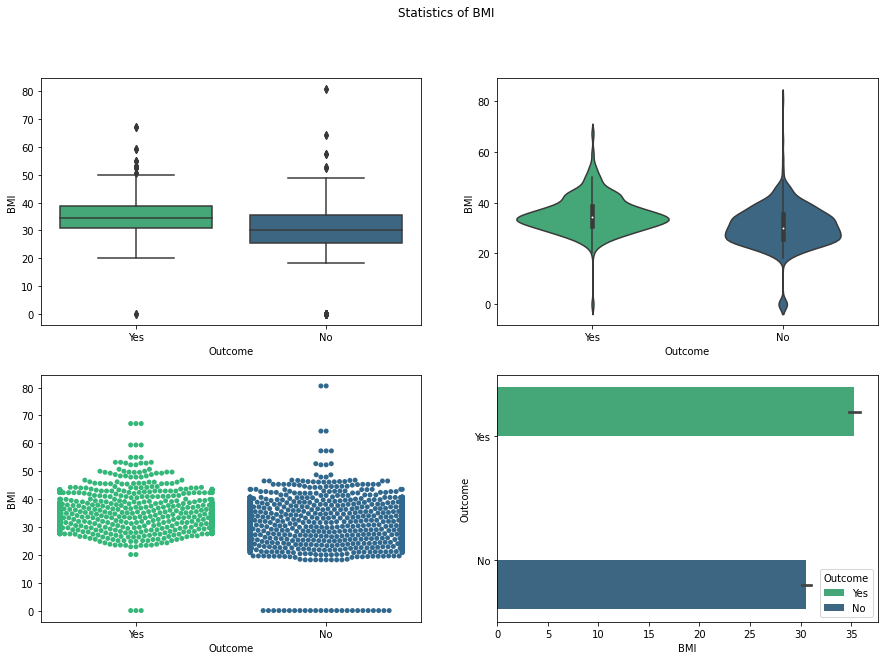

In [35]:
plot_stats("BMI")

### DPF

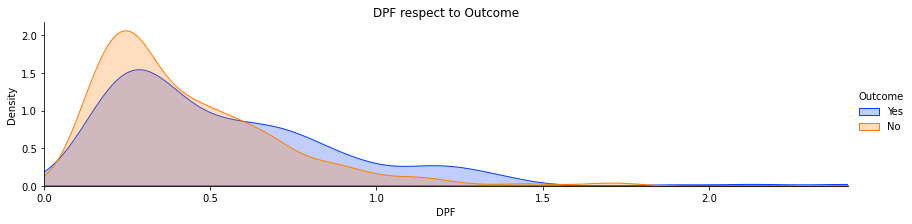

In [36]:
plot_kde("DPF")

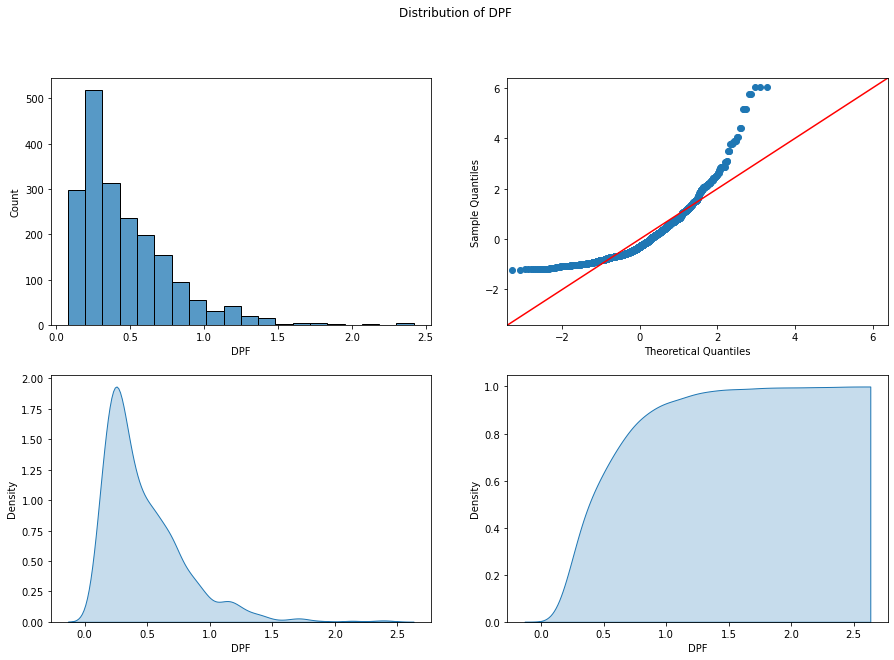

In [37]:
plot_distribution("DPF")

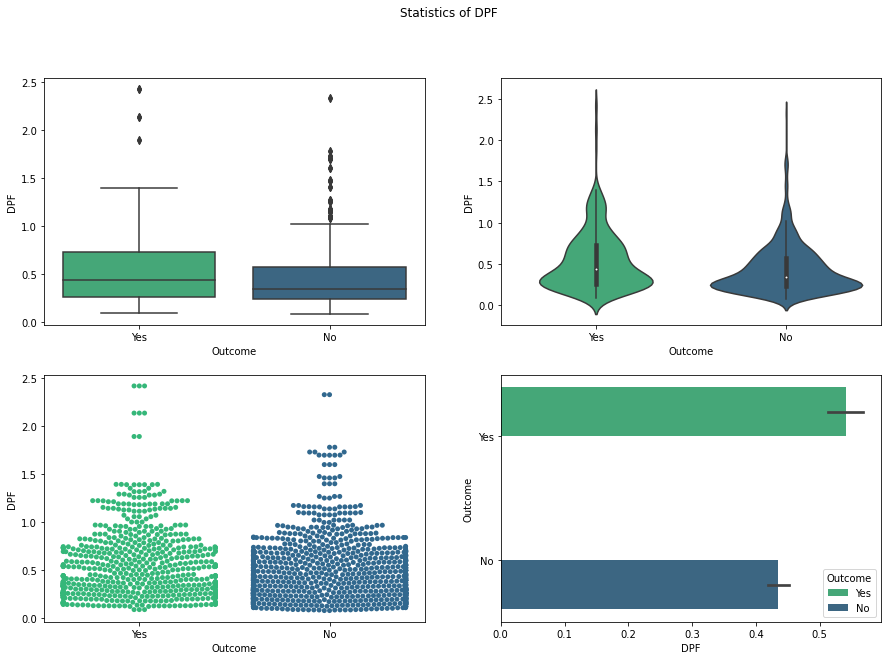

In [38]:
plot_stats("DPF")

### Age

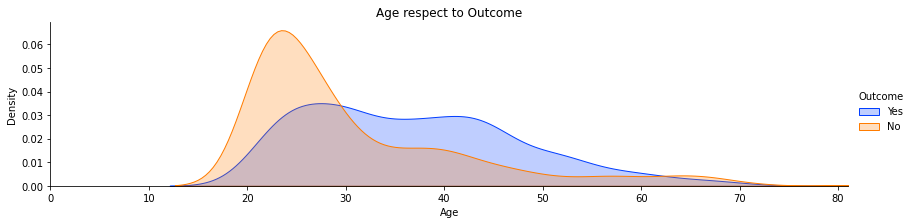

In [39]:
plot_kde("Age")

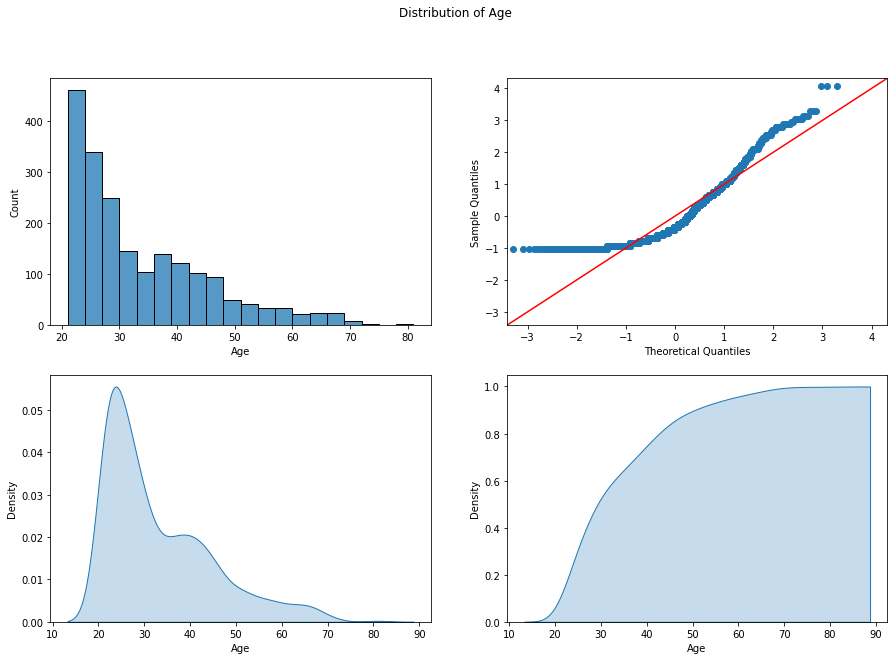

In [40]:
plot_distribution("Age")

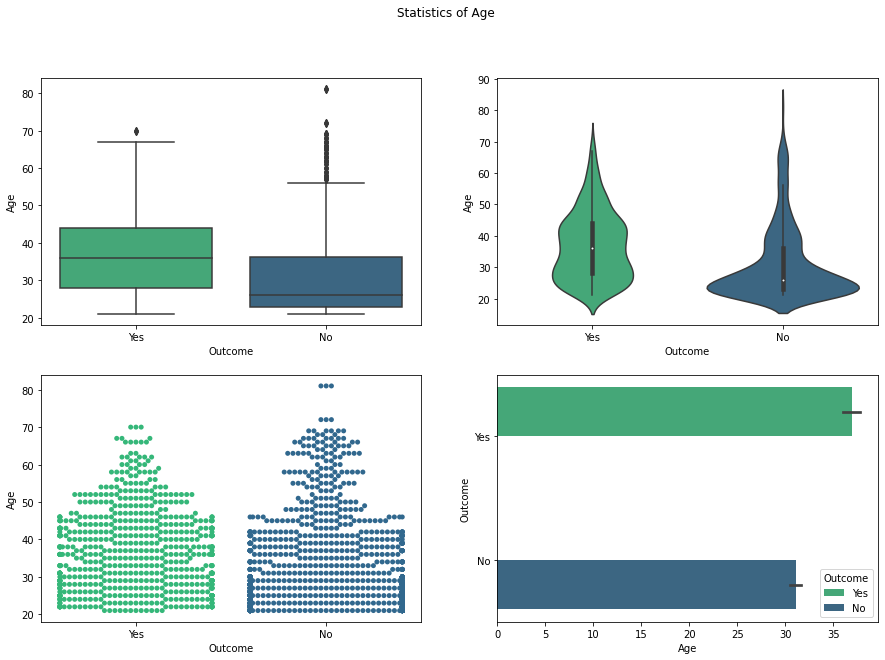

In [41]:
plot_stats("Age")

### Pair Plot

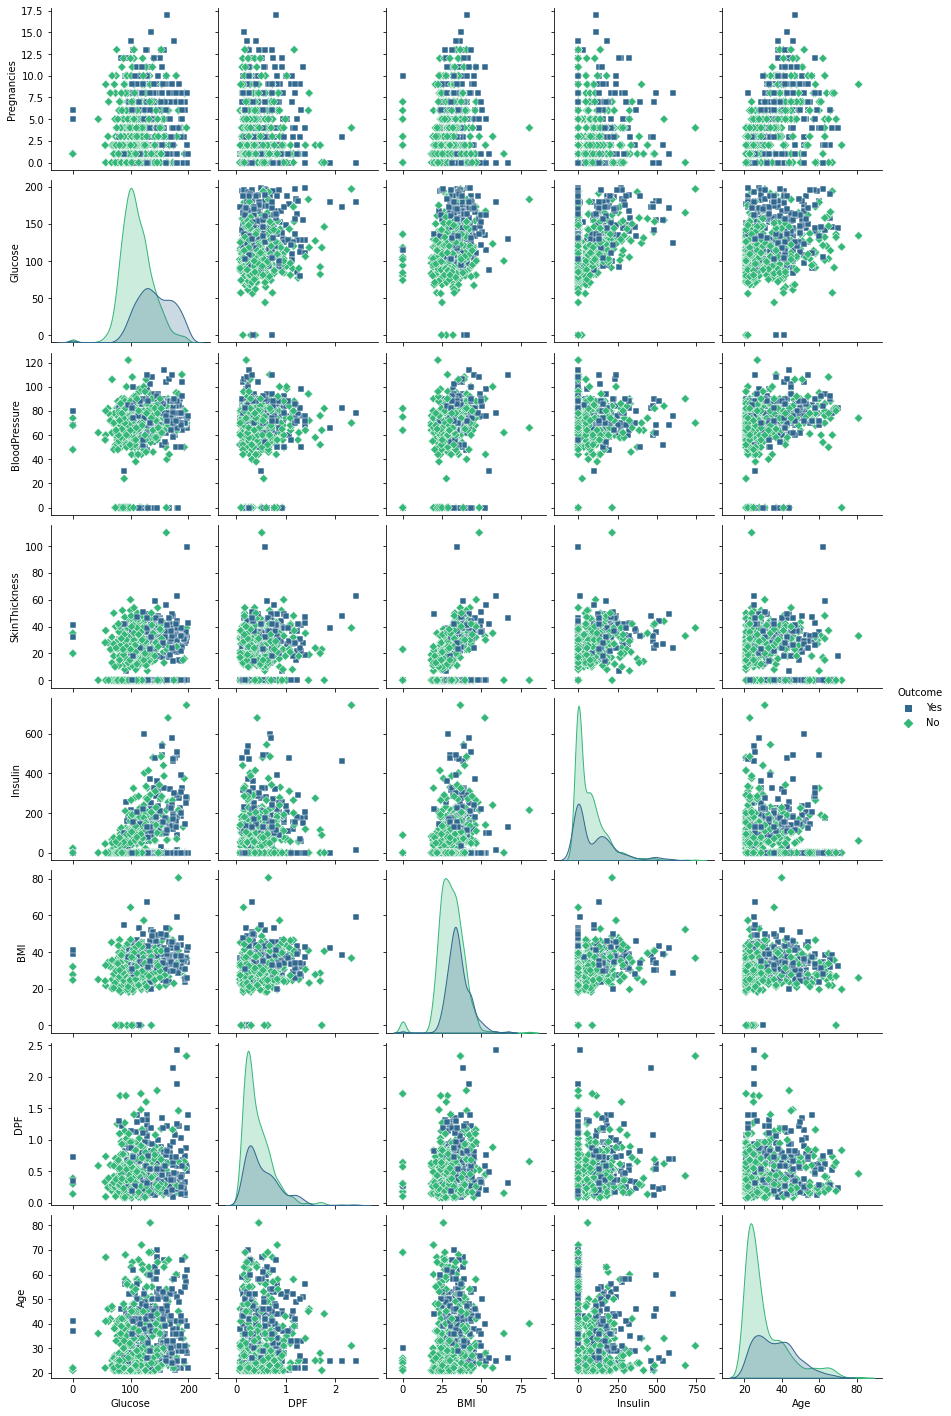

In [42]:
sns.pairplot(
    df,
    hue="Outcome",
    x_vars=["Glucose", "DPF", "BMI", "Insulin", "Age"],
    markers=["s", "D"],
    palette="viridis",
)  # pairplot with given columns in x axis and all columns in y axis
plt.show()  # shows the plot